Notebook elaborado para estudar as principais transformações do campo potencial aplicadas na interpretação de anomalias magnéticas.
Criado para a disciplina Geofísica II da Universidade Federal de Uberlândia.
O uso e a reprodução são livres para fins educacionais, pede-se apenas a citação da fonte.

[![License: GPL v3](https://img.shields.io/badge/License-GPLv3-blue.svg)](https://www.gnu.org/licenses/gpl-3.0)

Esta demonstração utiliza os códigos de transformação de campo potencial implementados no pacote *open source* [fatiando (v0.5)](https://github.com/fatiando/fatiando) (UIEDA; OLIVEIRA Jr; BARBOSA, 2013), distribuído sob os termos da [licença BSD-3](https://github.com/fatiando/fatiando/blob/master/LICENSE.txt). Não foram feitas modificações nos códigos utilizados.

Esta demonstração utiliza a modelagem de dados gravimétricos implementados no pacote *open source* [SimPEG v.14.3](https://github.com/simpeg/simpeg) (COCKETT et al., 2015), distribuído sob os termos da [licença MIT](https://github.com/simpeg/simpeg/blob/master/LICENSE). Não foram feitas modificações nos códigos utilizados.


Prof. Dr. Emerson Rodrigo Almeida<br>
Universidade Federal de Uberlândia<br>
Instituto de Geografia - Curso de Geologia<br>
emerson.almeida@ufu.br<br>

<p>&nbsp;</p>
Última modificação: 23/09/2022

# Instruções iniciais

Neste notebook você irá visualizar de campo total obtida em um levantamento simulado sobre dois corpos de geometrias diferentes e, em seguida, irá aplicar transformações sobre a anomalia magnética registrada para entender algumas das ferramentas empregadas na identificação dos corpos causadores destas anomalias. Para isto leia atentamente as instruções apresentadas antes de cada célula e execute-as uma a uma, para acompanhar o processo corretamente.

Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.

<p>&nbsp;</p>

# Passo 01 - Preparação

Primeiramente vamos preparar o ambiente para a execução da demonstração. Será preciso utilizar o [SimPEG](https://simpeg.xyz/), que é um pacote open source para modelagem de dados geofísicos.

Você pode executar o código na célula clicando sobre ela e em seguida clicando no botão **RUN** na barra do Jupyter Notebook ou pressionando as teclas **SHIFT+ENTER** no seu teclado. Se você preferir executar este notebook localmente, no seu computador, então exclua a célula abaixo para não afetar a sua instalação.

**Importante!** Nem todas as células irão retornar algum tipo de mensagem ou figura após a execução. Isto é normal e não significa que a execução tenha falhado. Perceba o símbolo **In [   ]:** próximo ao canto superior esquerdo de cada célula. Ao iniciar a execução de uma delas você verá um asterisco ($*$) aparecer dentro dos colchetes. Você saberá que a execução ocorreu sem problemas quando o $*$ dentro dos colchetes for substituído por um número e nenhuma mensagem de erro aparecer abaixo da célula executada.

In [1]:
import modulos.potenciais as mp
import numpy as np

C:\Users\emerson.almeida\Documents\UFU 2022\2 Areas\[Ens] demoaulas\Geofisica2\fatiando\vis\mpl.py:68: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  warnings.warn("This module will be removed in v0.6. We recommend the use of " +


# Passo 02 - Configuração do modelo

Aqui você irá definir primeiramente as dimensões do espaço do modelo, informando o comprimento que você deseja que seu modelo tenha e qual a discretização que deseja para ele. Cada variável na célula abaixo define uma dimensão para um eixo do modelo tridimensional.

Para este exemplo vamos começar com um modelo que tem 2000 m de comprimento (direção X), 2000 m de largura (direção Y) e 260 m de profundidade (direção Z) e é discretizado em elementos de 40.0 x 40.0 x 20.0 m. Configure estes valores executando a célula abaixo.

In [2]:
eixo_x = [2000.0, 40.0]      # [comprimento, delta]
eixo_y = [2000.0, 40.0]      # [comprimento, delta]
eixo_z = [260.0, 20.0]       # [comprimento, delta]

Em seguida, execute a célula abaixo para gerar um modelo cuja susceptibilidade magnética ($\chi$) homogênea é de 10$^{-3}$ (SI), correspondente à susceptibilidade magnética de uma rocha sedimentar.

In [3]:
meu_modelo = mp.modelo(eixo_x, eixo_y, eixo_z, 1e-3)

Agora você irá inserir corpos de diferentes susceptibilidades magnéticas no modelo para simular corpos na rocha encaixante sedimentar. Os contrastes serão representados por dois corpos de geometrias diferentes: o primeiro será um corpo em forma de cruz com centro nas coordenadas $(x, y)$ = (-240.0, 0.0) e topo em 50.0 m de profundidade, o segundo será um corpo linear simulando um dique com centro nas coordenadas $(x, y)$ = (440.0, 0.0) e topo em 150.0 m de profundidade. A susceptibilidade magnética de ambos os corpos é de 10$^{-1}$ (SI), correspondente à presença de mineralizações ricas em pirrotita.

Execute a célula abaixo para construir o modelo descrito acima.

In [4]:
# braço do corpo em forma de cruz na direção E-W (delta_rho, [(xi, xf),(yi, yf),(zi, zf)])
meu_modelo.insere_bloco(1e-1, [(-320.0, -160.0), (-240.0, 240.0), (-260, -50)])

# braço do corpo em forma de cruz na direção N-S (delta_rho, [(xi, xf),(yi, yf),(zi, zf)])
meu_modelo.insere_bloco(1e-1, [(-480.0, 0.0), (-80.0, 80.0), (-260, -50)])

# dique na direção N-S (delta_rho, [(xi, xf),(yi, yf),(zi, zf)])
meu_modelo.insere_bloco(1e-1, [(400, 480), (-1000, 1000), (-260, -150)])

Execute a célula abaixo para exibir vistas em corte do modelo e conferir o posicionamento dos corpos no modelo.

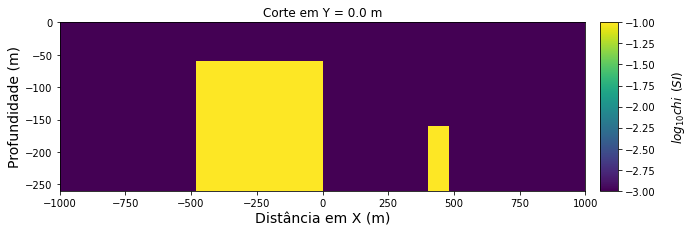

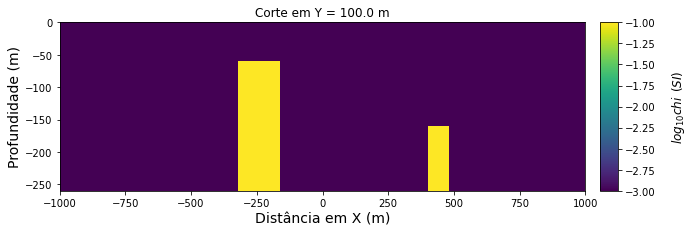

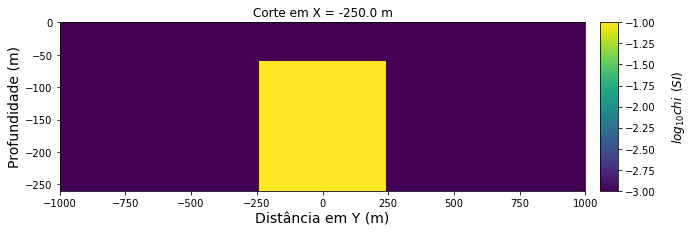

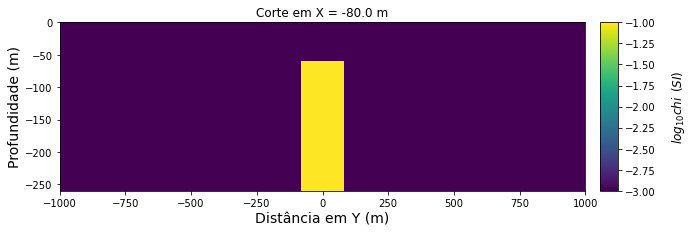

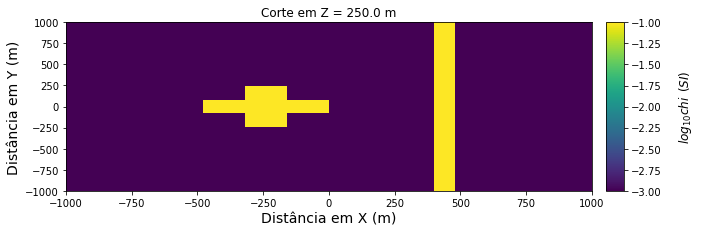

In [5]:
meu_modelo.plota_corte('Y', 0.0)
meu_modelo.plota_corte('Y', 100.0)
meu_modelo.plota_corte('X', -250.0)
meu_modelo.plota_corte('X', -80.0)
meu_modelo.plota_corte('Z', 250.0)

# Passo 03 - Configuração da aquisição

Agora será preciso definir os parâmetros de aquisição de dados, i.e., os pontos onde serão realizadas as medidas da intensidade do campo magnético total sobre o modelo. Estes dados serão adquiridos em uma grade de pontos equiespaçados distribuídos na superfície do modelo, portanto será preciso definir os pontos inicial e final para o eixo X e para o eixo Y, assim como o número de pontos ao longo de cada direção.

A assinatura de uma anomalia magnética está sujeita às características de inclinação, declinação e intensidade do campo geomagnético na região onde a aquisição é feita, de forma que a anomalia observada sobre um mesmo corpo pode apresentar comportamentos diferentes em diferentes locais do mundo. Como padrão iremos definir as características do campo geomagnético nas coordenadas onde encontra-se o campus da Universidade Federal de Uberlândia em Monte Carmelo (latitude = -18.723889°, longitude = -47.523889°, altitude = 890.0 m) no dia 20/04/2021, data em que este notebook foi redigido. Características destas componentes para outras localidades e outras datas podem ser obtidas a partir do [cálculo do IGRF](https://www.ngdc.noaa.gov/geomag/calculators/magcalc.shtml#igrfwmm).

Execute a célula abaixo para configurar estas características.

In [6]:
intensidade = 23170.0      # intensidade total em nT
inclinacao = -32.9685      # inclinação em graus
declinacao = -21.8344      # declinação em graus

Execute a célula abaixo para definir um levantamento realizado entre as coordenadas -1000.0 e 1000 do eixo X e entre as coordenadas -1000.0 e 1000.0 m do eixo Y, com 40 pontos de aquisição em cada direção. 

Esta simulação irá considerar também a altura do levantamento em 0.0 m, i.e., o levantamento será feito junto à superfície do modelo.

In [7]:
x_rx = np.linspace(-1000, 1000.0, 40)
y_rx = np.linspace(-1000.0, 1000.0, 40)
h_rx = 0.0

minha_aquisicao = mp.aquisicao(meu_modelo, f=intensidade, inc=inclinacao, dec=declinacao, xx_s=x_rx, yy_s=y_rx, h_s=h_rx)
%time minha_aquisicao.fwd(meu_modelo)

CPU times: total: 4min 33s
Wall time: 1min 6s


# Passo 03 - Mapa de intensidade do campo magnético total (TMI)

O mapa gerado pela simulação sobre o modelo corresponde ao conjunto de dados resultantes do procedimento de redução dos dados adquiridos em campo, que recebe o nome de mapa de intensidade de campo magnético total (TMI). Este mapa apresenta a anomalia dipolar causada pelo corpo imerso em um campo magnético externo.

Execute a célula abaixo para obter o mapa de TMI associado ao modelo configurado.

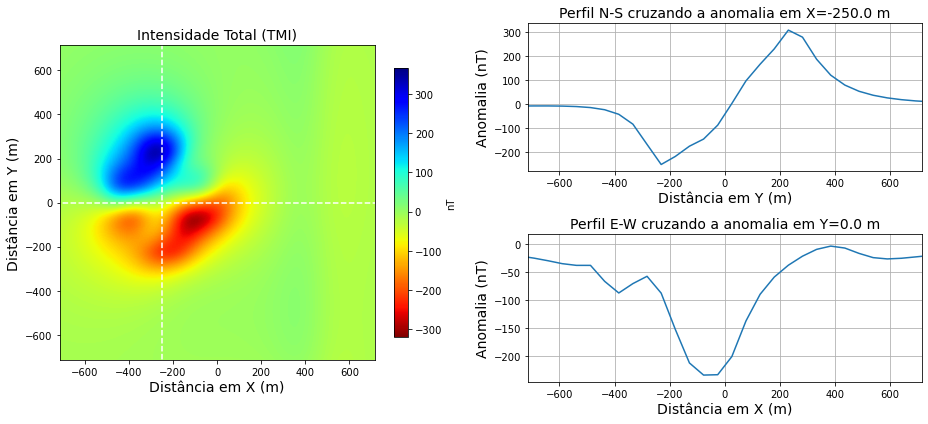

In [8]:
minha_aquisicao.plota_mapa([-250.0, 0.0])

# Transformações do campo

Os processos abaixo ilustram as possibilidades de visualização proporcionadas pelas ferramentas de transformação do campo potencial. Você pode modificar os valores numéricos entre colchetes para alterar a posição em que os perfis cruzam as anomalias.

### Continuação para cima

A continuação para cima simula o efeito anômalo causado pelos contrastes de densidade em alturas diferentes daquela em que os dados foram adquiridos. Esta transformação atua sobre o datum onde os dados foram adquiridos deslocando-o para cima, daí o nome desta operação. Isto faz com que a influência das anomalias de curto comprimento de onda seja minimizada, enquanto as anomalias de longo comprimento de onda ainda continuam presentes no dado apresentando uma amplitude ligeiramente menor do que a amplitude original. Trata-se, portanto, de um tipo de filtragem que remove do dado as anomalias de curto comprimento de onda.

Existem duas aplicações principais para este tipo de procedimento: i) colocar diferentes conjuntos de dados em um mesmo datum para que sejam trabalhados em conjunto, como por exemplo quando se tem dados adquiridos em levantamentos aéreo e terrestre sobre uma mesma região, e ii) para estimar a influência do campo regional, que poderá ser utilizado para o cálculo do campo resitual.

No modelo utilizado neste notebook os dados foram adquiridos em terra ($h$ = 0.0 m). Execute a célula abaixo para transportar esta aquisição para uma altura de 500.0 m acima da superfície ($h$ = 500.0 m), obtendo assim um mapa de continuação para cima.

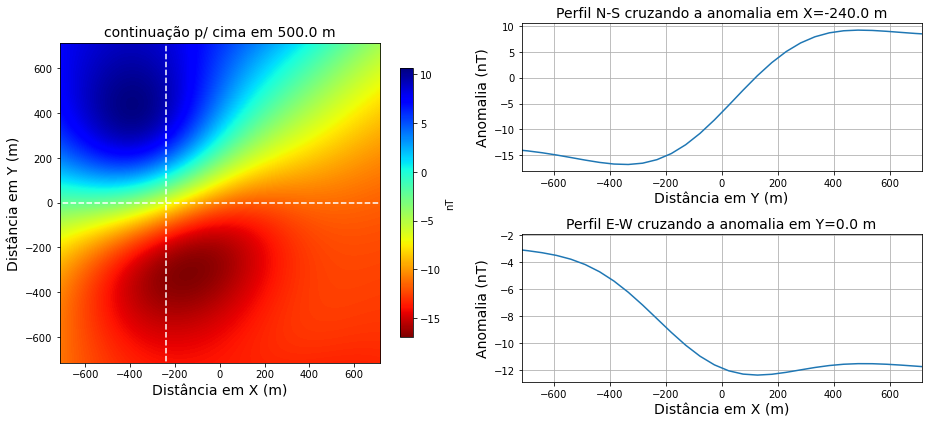

In [9]:
alt = 500.0        # altura da continuação (em metros)

minha_aquisicao_up = mp.continuacao(minha_aquisicao, alt)
minha_aquisicao_up.plota_mapa([-240.0, 0.0])

### Campo residual

Uma aquisição de dados magnéticos realizada em campo requer o cálculo do campo residual, que corresponde a subtrair a intensidade calculada pelo IGRF na data em que o levantamento foi realizado do TMI na região de aquisição. Como aqui estamos trabalhando com dados modelados esta etapa não será necessária pois o resultado da modelagem já corresponde ao campo residual, porém é importante que você saiba que esta é uma etapa necessária quando for trabalhar com dados reais.

### Redução ao polo (RTP)

Uma vez calculado o campo residual tem-se o mapa de anomalias geradas pelos corpos e estruturas geológicos presentes na região de interesse. Entretanto, note que as anomalias magnéticas geradas apresentam um caráter dipolar, com um pico positivo e um pico negativo. Este comportamento varia em função da inclinação do campo geomagnético e, portanto, varia em função da latitude em que o levantamento foi realizado (se estiver com dúvidas quanto a isto, consulte o [notebook 1 de magnetometria](link aqui)). As anomalias magnéticas possuem a característica de apresentarem apenas um único pico, positivo, quando são geradas por um corpo posicionado no polo magnético. Podemos então aplicar um cálculo de transformação do campo chamado de **redução ao polo**, que consiste em utilizar o campo TMI para calcular como seria a anomalia correspondente a este corpo se ele estivesse posicionado no polo magnético. Com isto a anomalia passa a apresentar um caráter unipolar e pode ser melhor localizada sobre o corpo que a causa.

Execute a célula abaixo para calcular a redução ao polo da anomalia observada no campo reduzido. Todas as transformações de campo subsequentes são aplicadas sobre este mapa.

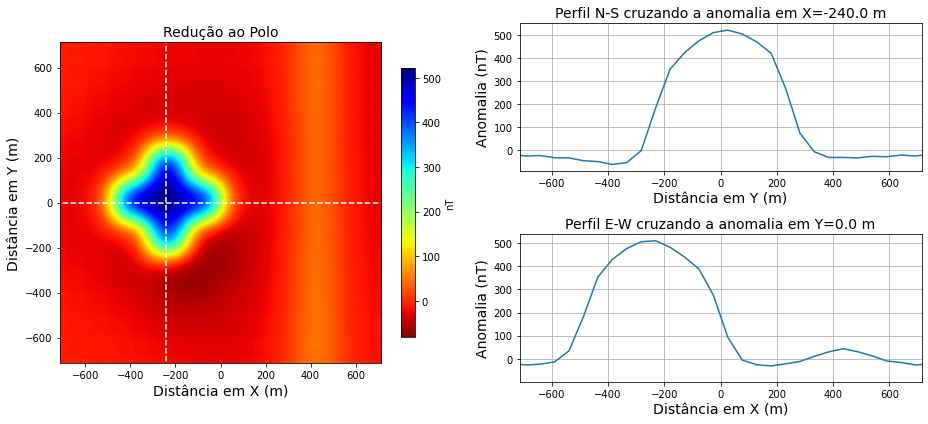

In [10]:
minha_aquisicao_rtp = mp.red_polo(minha_aquisicao, inc=-35.9195, dec=-22.2848)
minha_aquisicao_rtp.plota_mapa([-240.0, 0.0])

**Obs.:** Dados adquiridos em levantamentos realizados em baixas latitudes podem apresentar instabilidade quando submetidos ao processo de redução ao polo. Nestes casos costuma-se adotar a **Redução ao Equador (RTE)**, que consiste em uma transformação semelhante porém calculando a anomalia correspondente ao corpo se este estivesse posicionado na regão do equador magnético. Este procedimento gera uma anomalia com um pico negativo centralizado sobre o corpo e com dois picos levemente positivos próximos ao pico negativo, formando uma anomalia simétrica. A redução ao equador gera anomalias mais complexas do que aquelas geradas pela redução ao polo e em geral é utilizada apenas quando a redução ao polo não fornece resultados satisfatórios para a interpretação.

### Segunda derivada vertical

A segunda derivada vertical consiste em calcular a derivada vertical de segunda ordem sobre as anomalias observadas no mapa residual. A segunda derivada vertical permite obter uma ideia sobre a geometria do corpo causador da anomalia, dando maior ênfase às anomalias mais rasas.

Execute a célula abaixo para calcular a 2a derivada vertical dos dados do mapa  do campo reduzido ao polo.

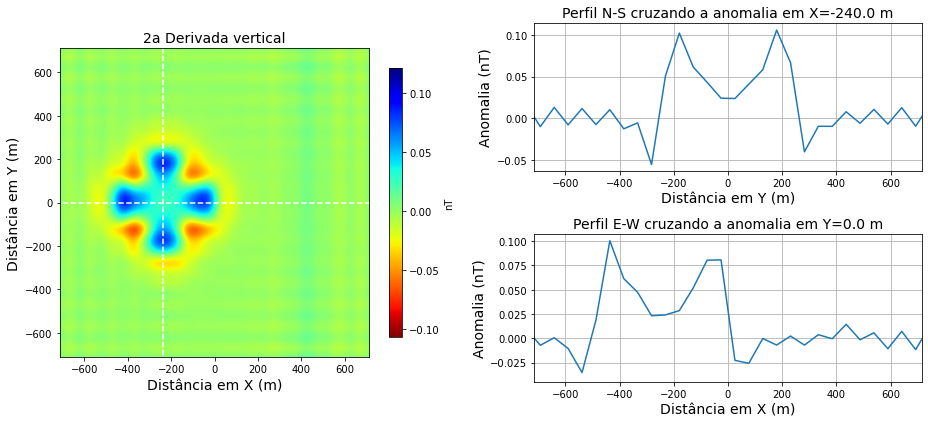

In [11]:
minha_aquisicao_dz2 = mp.derivada_z(minha_aquisicao_rtp, ordem=2)
minha_aquisicao_dz2.plota_mapa([-240.0, 0.0])

### Amplitude do Gradiente Total (TGA)

A amplitude do Gradiente Total (TGA) é um outro cálculo de transformação que permite delimitar a geometria de um corpo, porém agora utilizando a raiz quadrática da soma dos quadrados das derivadas do campo residual nas três direções, ou seja:

$$ TGA = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 + \left(\frac{\partial f}{\partial y}\right)^2 + \left(\frac{\partial f}{\partial z}\right)^2 } $$

em que $f$ representa a amplitude da anomalia após a remoção do campo regional.

Execute a célula abaixo para calcular O TGA dos dados do mapa do campo reduzido ao polo.

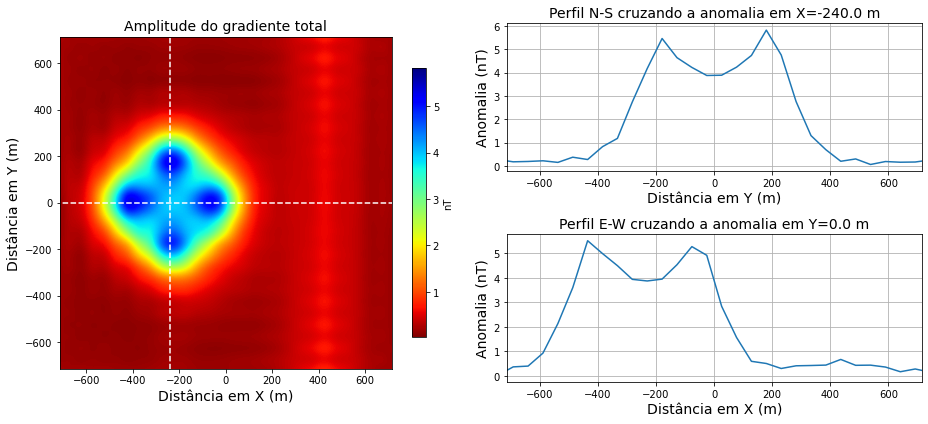

In [12]:
minha_aquisicao_tga = mp.gradiente_total(minha_aquisicao_rtp)
minha_aquisicao_tga.plota_mapa([-240.0, 0.0])

**Obs.:** Alguns autores referem-se à Amplitude do Gradiente Total pelo termo **Amplitude do Sinal Analítico (ASA)**, porém esta nomenclatura tem caído em desuso por ser uma nomenclatura menos adequada para representar o que de fato é calculado neste procedimento. 

### Derivada *Tilt* (T)

A derivada *tilt* é uma ferramenta de realce que permite estimar a geometria dos corpos a partir do cálculo do ângulo de inclinação (*tilt*) do gradiente, ou seja: 

$$T = tan^{-1}\left(\frac{{\partial f / \partial z}}{\sqrt{({\partial f / \partial x})^2 + ({\partial f / \partial y})^2}}\right)$$

A derivada *tilt* considera a normalização do gradiente vertical pelo gradiente horizontal total, permitindo visualizar no mapa tanto as anomalias causadas por fontes mais rasas quanto aquelas causadas por fontes mais profundas.

Execute a célula abaixo para calcular a derivada tilt dos dados do mapa do campo reduzido ao polo. Perceba como agora é possível identificar também a presença do dique, que não era claramente vicível nos mapas de Segunda Derivada Vertical e de TGA, além de termos uma definição mais acurada da geometria do corpo em forma de cruz.

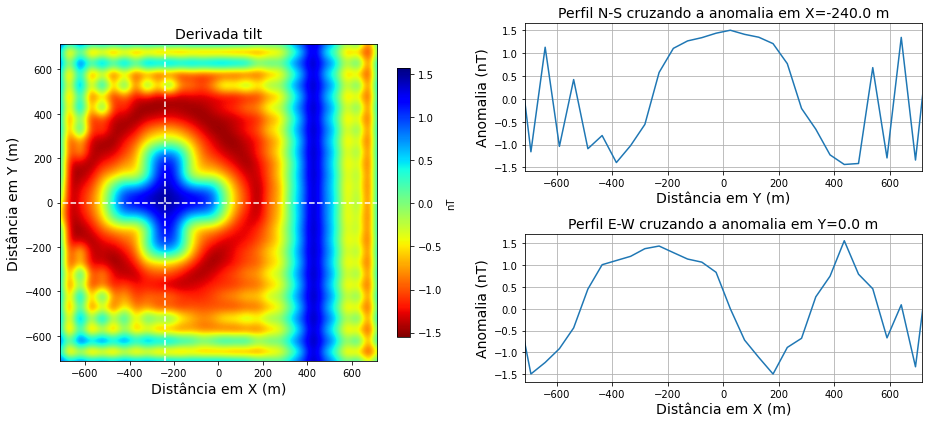

In [13]:
minha_aquisicao_tilt = mp.derivada_tilt(minha_aquisicao_rtp)
minha_aquisicao_tilt.plota_mapa([-240.0, 0.0])

### Gradiente Horizontal Total (TDX)

O gradiente horizontal total permite evidenciar as bordas de um corpo em qualquer orientação, e é dado por (COOPER e COWAN, 2006):

$$fx_{tot} = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 + \left(\frac{\partial f}{\partial y}\right)^2}$$


Sendo mais comum o cálculo do ângulo do gradiente horizontal total normalizado pela amplitude da derivada vertical, ou seja, a normalização realizada para o cálculo do TDX é inversa à realizada no cálculo da Derivada tilt. Este gradiente normalizado é calculado por (COOPER e COWAN, 2006):

$$TDX = tan^{-1}\left(\frac{\sqrt{({\partial f / \partial x})^2 + ({\partial f / \partial y})^2}}{{|\partial f / \partial z|}}\right)$$

Execute a célula abaixo para calcular o TDX dos dados do mapa  do campo reduzido ao polo. Observe que as maiores amplitudes do gradiente horizontal definem o contorno tanto do corpo em forma de cruz, mais raso, quanto do dique, mais profundo.

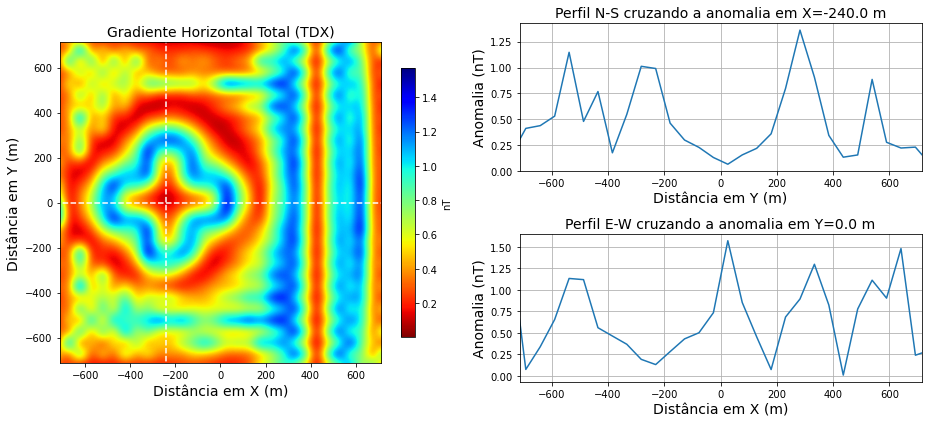

In [14]:
minha_aquisicao_tdx = mp.tdx(minha_aquisicao_rtp)
minha_aquisicao_tdx.plota_mapa([-240.0, 0.0])

### Gradiente Horizontal Total da Derivada Tilt (THDR)

Uma outra forma de obter um mapa dos contornos dos corpos é calculando o grandente horizontal total do mapa da derivada tilt (VERDUZCO et al.; 2004):

$$THDR = \sqrt{\left(\frac{\partial T}{\partial x}\right)^2 + \left(\frac{\partial T}{\partial y}\right)^2}$$

em que $T$ representa a amplitude da anomalia no mapa de Derivada Tilt.

Execute a célula abaixo para calcular o THDR dos dados do mapa da derivada tilt. Observe como o THDR reduz a saturação dos contornos dos corpos, reduzindo o efeito de artefatos presentes no mapa de TDX visto acima. 

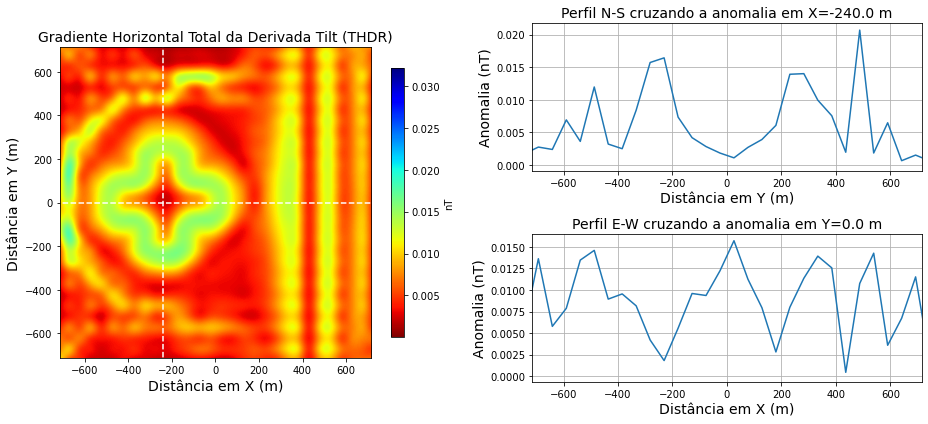

In [15]:
minha_aquisicao_thdr = mp.thdr(minha_aquisicao_tilt)
minha_aquisicao_thdr.plota_mapa([-240.0, 0.0])

### T+TDX e T-TDX

Castro et al. (2018) propuseram dois cálculos para auxiliar na definição de corpos causados por anomalias magnéticas, que consistem em realizar combinações dos mapas de Derivada tilt (T) e de gradiente horizontal total (TDX). O primeiro caso consiste em somar ambos os mapas (i.e., T+TDX) para obter uma estimativa da extensão lateral dos corpos rasos e profundos a partir da amplitude máxima das anomalias observadas. O segundo caso consiste em calcular uma subtração entre estes mapas (i.e., T-TDX) para obter uma estimativa do centro dos corpos a partir dos valores máximos das anomalias.

Execute a célula abaixo para realizar ambos os cálculos e visualizar as anomalias correspondentes.

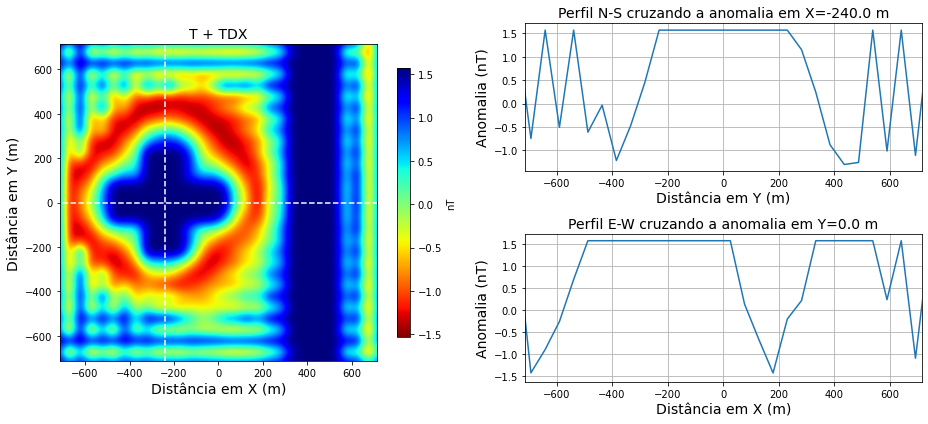

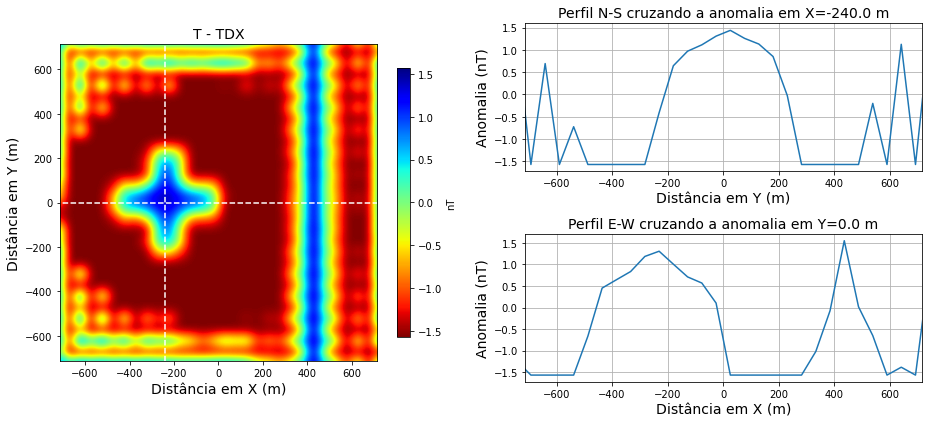

In [16]:
minha_aquisicao_tptdx = mp.tptdx(minha_aquisicao_tilt, minha_aquisicao_tdx)
minha_aquisicao_tptdx.plota_mapa([-240.0, 0.0])

minha_aquisicao_tmtdx = mp.tmtdx(minha_aquisicao_tilt, minha_aquisicao_tdx)
minha_aquisicao_tmtdx.plota_mapa([-240.0, 0.0])

---


## Referências:

CASTRO, F. R. et al. Combining tilt derivative filters: new approaches to enhance magnetic anomalies. **Revista Brasileira de Geofísica**, v. 36, n. 3, p. 335-343, 2018.

COOPER, G. R. J.; COWAN, D. R. Enhancing potential field data using filters based on the local phase. **Computers & Geosciences**, v. 32, n. 10, p. 1585-1591, 2006.

UIEDA, L.; OLIVEIRA Jr, V. C.; BARBOSA, V. C. F. Modeling the Earth with Fatiando a Terra. **Proceedings of the 12th Python in Science Conference**, p. 91-98, 2013.

COCKETT, R.; KANG, S.; HEAGY, L. J.; PIDLISECKY, A.; OLDENBURG, D. W. SimPEG: An open source framework for simulation and gradient based parameter estimation in geophysical applications. **Computers & Geosciences**, v.85, Part A, p. 142-154, 2015.

VERDUZCO, B. et al. New insights into magnetic derivatives for structural mapping. **The Leading Edge**, v. 23, n. 2, p. 116-119, 2004.